In [70]:
import numpy as np
from os.path import join
from colossus.halo import concentration
from colossus.cosmology import cosmology
from halotools.sim_manager import TabularAsciiReader

In [71]:
%matplotlib inline
from seaborn import jointplot

In [72]:
directory = '/u/ki/swmclau2/des/NewAemulusBoxes/Box000/halos/m200b/'

In [73]:
z = 1/(0.8)-1
idx = 7

In [74]:
columns_to_keep_dict = {'halo_m200b': (2, 'f4'), 'halo_r200b': (5, 'f4'), 'halo_rs':(6, 'f4')}
tar = TabularAsciiReader(join(directory, "outbgc2_rs_%d.list"%idx), columns_to_keep_dict)
catalog = tar.read_ascii()


...Processing ASCII data of file: 
/u/ki/swmclau2/des/NewAemulusBoxes/Box000/halos/m200b/outbgc2_rs_7.list
 
Total number of rows in detected data = 10079884
Number of rows in detected header = 1 

... working on chunk 0 of 2
... working on chunk 1 of 2
Total runtime to read in ASCII = 1.0 minutes




In [75]:
import pandas as pd
param_file = '~swmclau2/des/LH_eigenspace_lnA_np7_n40_s556.dat'

cosmo_params = pd.read_csv(param_file, sep = ' ', index_col = None)

cosmo_idx = 0
cosmo_vals = np.array(list(cosmo_params.iloc[cosmo_idx].values))
names =  list(cosmo_params.columns.values)
cosmo_dict = dict(zip(names, cosmo_vals))
print names

['ombh2', 'omch2', 'w0', 'ns', 'ln10As', 'H0', 'Neff']


In [76]:
h = cosmo_dict['H0']/100
Oc = cosmo_dict['omch2']/(h**2)
Ob = cosmo_dict['ombh2']/(h**2)
Om = Ob+Oc

In [77]:
#look up sigma8 in the ics

In [78]:
params = {'flat': True, 'H0': cosmo_dict['H0'] , 'Om0': Om, 'Ob0': Ob, 'sigma8': 0.773, 'ns': cosmo_dict['ns'],
         'Neff': cosmo_dict['Neff'], 'w0':cosmo_dict['w0']}

In [79]:
cosmology.setCosmology('myCosmo', params)

In [80]:
downsample_factor = 1e-3
downsample_idxs = np.random.choice(catalog['halo_m200b'].shape[0],int(catalog['halo_m200b'].shape[0]*downsample_factor), replace = False )

In [81]:
catalog = catalog[downsample_idxs]

In [82]:
c_model_c = concentration.concentration(catalog['halo_m200b'], '200m', z, model = 'ludlow16')

In [83]:
concs = catalog['halo_r200b']/catalog['halo_rs']

/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [84]:
zero_idxs = catalog['halo_rs'] != 0

concs = concs[zero_idxs]
c_model_c = c_model_c[zero_idxs]

In [85]:
from matplotlib import pyplot as plt

(array([2.300e+01, 1.050e+02, 6.670e+02, 2.393e+03, 3.920e+03, 2.194e+03,
        5.320e+02, 1.360e+02, 1.700e+01, 2.000e+00]),
 array([-0.3087908 , -0.03830768,  0.23217544,  0.50265855,  0.7731417 ,
         1.0436249 ,  1.3141079 ,  1.584591  ,  1.8550742 ,  2.1255574 ,
         2.3960404 ], dtype=float32),
 <a list of 10 Patch objects>)

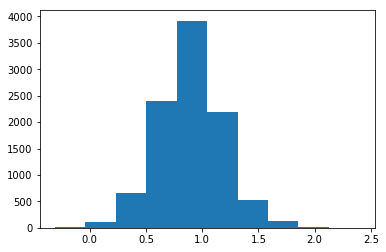

In [86]:
plt.hist(np.log10(concs) )

(array([   8.,   35.,   73.,  217.,  496., 1004., 2097., 4442., 1446.,
         171.]),
 array([0.72934306, 0.76663435, 0.8039257 , 0.841217  , 0.8785083 ,
        0.9157996 , 0.9530909 , 0.99038225, 1.0276736 , 1.0649649 ,
        1.1022562 ], dtype=float32),
 <a list of 10 Patch objects>)

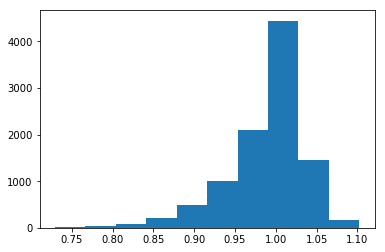

In [87]:
plt.hist(np.log10(c_model_c))

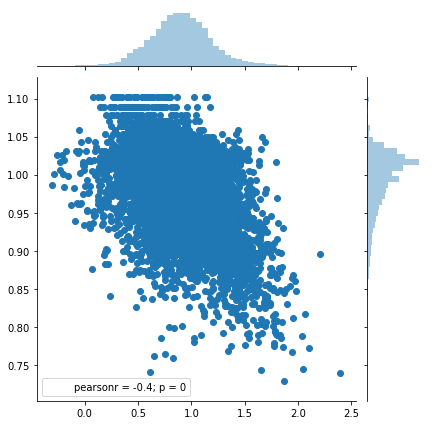

In [88]:
jointplot(np.log10(concs), np.log10(c_model_c) )